<font color = #000066 size=6.5> Facultad de Ciencias</font> 

<br><font color = #CC9933 size=6.5> UNAM </font> 

 <br><font color = silver size=7> Programación en Python</font> 

***

# Notas del curso Métodos Cuantitativos en Finanzas (Parte 3)


El presente curso de programación está dividido en partes para mantener más legible, entendible y ordenado el contenido. 

<br><font color = #708090 size=1> El contenido de este documento fue inspirado en las notas de los cursos *Python for Finance* e *Introduction to Python Primer* impartidos por los doctores Antoine Jacquier, Aitor Murguraza Gonzalez y Riaz Ahmad. Para cualquier duda o comentario del contenido, escribir a marianne.toscano@ciencias.unam.mx  </font>  

In [1]:
import numpy as np

## Generación de números random

NumPy a través de la sentencia numpy.random proporciona una forma eficiente de producir numelos aleatorios de distribuciones específicas:

### Binomial

In [2]:
np.random.binomial(50,0.25) # distribución binomial(n,p) 

12

In [3]:
np.random.binomial(50,0.25,(2,3,4)) # crea un np.array de simensiones 2, 3 renglones cada uno, 4 columnas 

array([[[16, 15,  9, 12],
        [18, 12, 16, 15],
        [14, 13, 19, 12]],

       [[13, 13, 18, 19],
        [18,  9, 13, 10],
        [11, 18, 12, 13]]])

### Uniforme

In [4]:
np.random.uniform(0,1) 

0.13898741617378174

In [5]:
np.random.uniform()

0.8731679961288226

In [6]:
np.random.uniform(1,4) # U(1,4)

3.139451137276992

In [7]:
x=np.random.uniform(0,1,(2,2)) # matriz de 2x2 U(0,1)
print(x)

[[0.27882278 0.67695872]
 [0.23231485 0.09058867]]


### Normal 
La función `normal()` genera, de una distribución normal estándar un numero aleatorio. Con dos parametros `normal(mu, sigma)` genera un numero aleatorio de una distribución normal con media $\mu$ y desviación estándar $\sigma$. Finalmente `normal(mu,sigma,(n,m))`genera un arreglo de dimensiones n por m de una distribución
$\mu+\sigma\phi$ que genera un vector aleatorio $X{\sim}N(\mu,{\sigma^2})$.

In [8]:
x=np.random.normal(0,1,(50))
x

array([ 0.04127232, -0.96765519, -1.47031372,  0.7881635 ,  0.79974082,
       -0.37268146,  1.29593036, -0.19942729, -0.34974168, -0.77541245,
        1.00916454, -0.05144995,  0.27147284, -1.05707542,  1.42297164,
       -0.19935397, -1.30339292, -0.14059021,  0.8193651 ,  0.24087073,
        0.62961875, -0.06523418,  0.43467445, -0.86061783, -0.14781781,
       -1.1553015 ,  2.88194315,  1.29214321, -2.02334674, -0.99440297,
       -0.31748589, -0.29833732, -0.62902057, -0.68069246, -0.08566689,
        0.90849754,  1.7326911 ,  1.43634774,  1.00705916, -0.42892801,
       -0.12829489,  0.5613302 , -1.40216508,  0.44369549,  0.1435257 ,
        0.426032  ,  2.50645896, -0.9919872 ,  0.69037211, -2.92881484])

In [9]:
np.mean(x)

0.03516265920834515

In [10]:
np.var(x)

1.1702525181790906

In [11]:
np.std(x)

1.081782102911252

### Lognormal 

La funciòn `lognormal()`simula numeros aleatorios de una distribución log normal de parámetros $\mu = 0$ y $\sigma = 1$

In [12]:
z = np.random.lognormal(0,1,(3,3)) # el tercer parametro es la dimensión del arreglo de la función
z

array([[1.320018  , 1.3227325 , 4.23888472],
       [1.38327097, 0.27509164, 1.69184423],
       [0.99104487, 0.402651  , 1.08461135]])

### Poisson $\lambda$

In [13]:
np.random.poisson() # lambda = 1, por default

0

In [14]:
np.random.poisson(4) # lambda = 4

3

In [15]:
x = np.random.poisson(3,(2,2)) # 2 por 2 con valor esperado = 3
print(x,np.mean(x))

[[2 4]
 [5 5]] 4.0


## Semillas

La semilla es una función muy util para manejar numeros aleatorios. se puede utilizar de dos maneras: primero `seed()`inicializzará o reinicializará el. generador de numeros aleatorios, segundo, `seed(s)`servirá para inicializar el generador de numeros aleatorios en un estado particular. 

In [16]:
np.random.seed(2)
np.random.normal(0,1,(2,2))

array([[-0.41675785, -0.05626683],
       [-2.1361961 ,  1.64027081]])

In [17]:
np.random.normal(0,1,(2,2))

array([[-1.79343559, -0.84174737],
       [ 0.50288142, -1.24528809]])

**Consejo:** puedes usar el alias `npr`para acortar la sentencia completa

In [18]:
import numpy.random as npr

npr.seed(7866)
npr.normal(0,1,(2,2))

array([[ 2.20108726,  1.22775417],
       [ 1.5471275 , -0.27521849]])

# Visualización de datos

## Graficando distribuciones

In [19]:
import matplotlib.pyplot as plt 

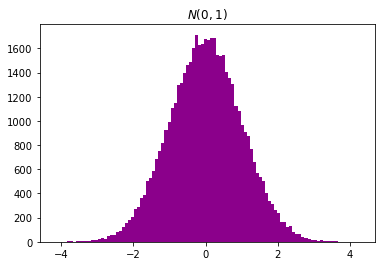

In [20]:
### Normal estándar
X = npr.standard_normal(50000)
plt.hist(X, bins = 100, color = 'darkmagenta') # https://matplotlib.org/3.1.0/gallery/color/named_colors.html
plt.title('$N(0,1)$')
plt.show()

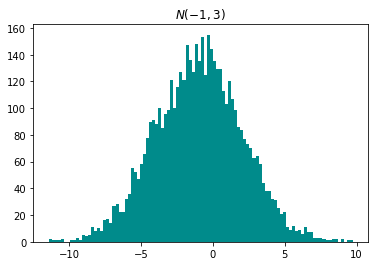

In [21]:
### Normal 
Y = npr.normal(-1, 3, (5000))
plt.title('$N(-1,3)$')
plt.hist(Y,bins=100, color = 'darkcyan')
plt.show()

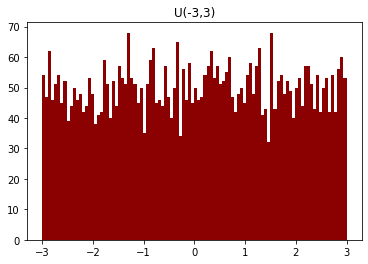

In [22]:
### uniform ###
Z = npr.uniform(-3, 3, (5000)) 
plt.hist(Z,bins=100, color= 'darkred')
plt.title('U(-3,3)')
plt.show()

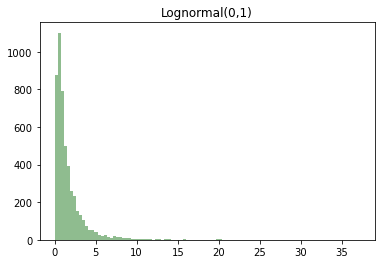

In [23]:
### lognormal

W = npr.lognormal(0, 1, (5000))
plt.hist(W,bins=100, color = 'darkseagreen')
plt.title('Lognormal(0,1)')
plt.autoscale(enable=True)
plt.show()

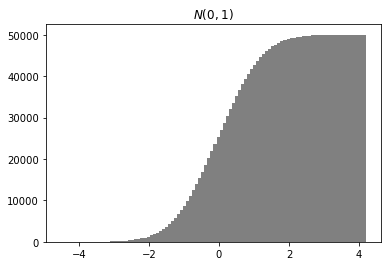

In [24]:
### Normal acumulada
X = npr.standard_normal(50000)
plt.hist(X,bins=100, cumulative = True, color='grey')
plt.title('$N(0,1)$')
plt.show()

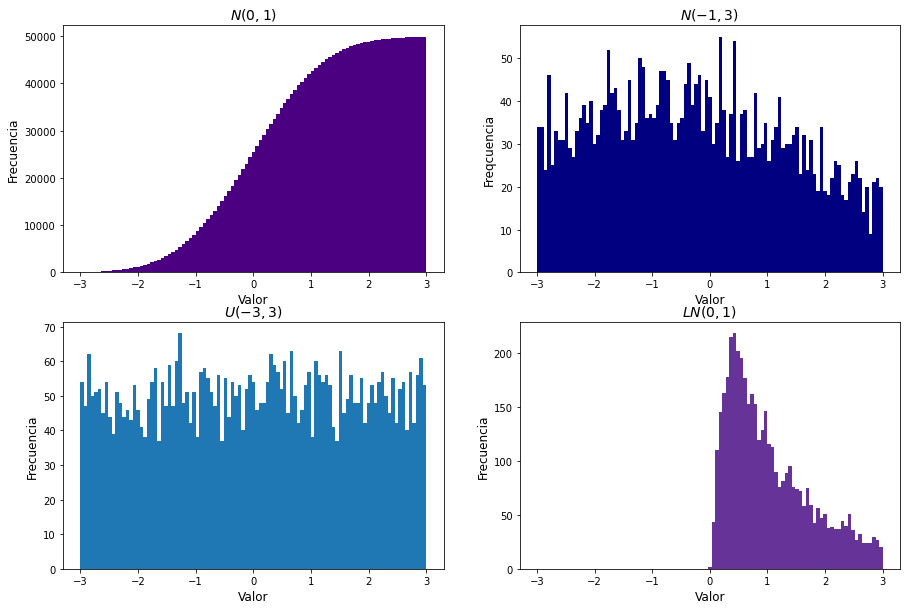

In [25]:
bins = np.linspace(-3,3,100) # define the width of the bins
fig = plt.figure(figsize = (15,10)) # la medida de la figura


sub1 = fig.add_subplot(221) # en una matriz de 2x2, el elemento 1
plt.hist(X,bins,cumulative=True, color = 'indigo')
plt.title('$N(0,1)$', fontsize = 14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

sub2 = fig.add_subplot(222)
plt.hist(Y,bins, color = 'navy')
plt.title('$N(-1,3)$', fontsize = 14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Freqcuencia', fontsize=12)

sub3 = fig.add_subplot(223)
plt.hist(Z,bins)
plt.title('$U(-3,3)$', fontsize = 14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

sub4 = fig.add_subplot(224)
plt.hist(W,bins, color = 'rebeccapurple')
plt.title('$LN(0,1)$', fontsize = 14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.show()

In [26]:
# Obtener data de yahoo finance 

# import yfinance as yf
# stocks = yf.download(symbols, start='2017-01-01', end='2021-12-31', progress=False)['Adj Close']
# stocks.to_csv('datos/stocks.csv')

In [27]:
# !pip install cufflinks

In [28]:
# Import base libraries
from numpy import *
from numpy.linalg import multi_dot
import pandas as pd

# Import cufflinks
import cufflinks as cf
cf.set_config_file(
    offline=True, 
    dimensions=((800,600)),
    theme= 'henanigans')

# Import plotly express for EF plot
import plotly.express as px
px.defaults.template = "plotly_dark"
px.defaults.width = 1000
px.defaults.height = 600

# Ignore warnings
#import warnings
#warnings.filterwarnings('ignore')

In [29]:
# Load locally stored data
df = pd.read_csv('datos.csv', index_col=0, parse_dates=True)

df.columns = ["ETF_SPX", "MSCI_Europe", "MSCI_China", "NAFTRAC"]

# Verify the output
df

,ETF_SPX,MSCI_Europe,MSCI_China,NAFTRAC
Date,,,,
2022-03-25,454.64,53.13,53.0900,55.47
2022-03-24,452.36,53.06,54.1800,55.87
2022-03-23,447.39,52.76,54.6900,55.23
2022-03-22,453.07,53.70,55.0400,55.85
2022-03-21,447.61,53.03,53.0000,NaN
...,...,...,...,...
2012-03-09,138.05,NaN,45.9675,37.69
2012-03-08,137.51,NaN,45.4400,37.82
2012-03-07,136.17,NaN,44.3500,37.55


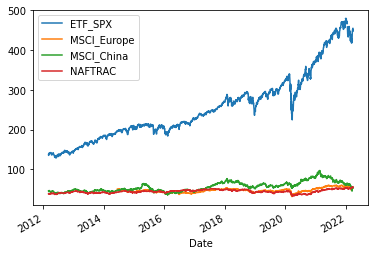

In [30]:
df.plot()

## ¿Gemelos? (Cufflinks)

Visualización de datos avanzada. https://www.analyticsvidhya.com/blog/2021/06/advanced-python-data-visualization-libraries-plotly/


In [31]:
cf.help()

Use 'cufflinks.help(figure)' to see the list of available parameters for the given figure.
Use 'DataFrame.iplot(kind=figure)' to plot the respective figure
Figures:
	bar
	box
	bubble
	bubble3d
	candle
	choroplet
	distplot
	heatmap
	histogram
	ohlc
	pie
	ratio
	scatter
	scatter3d
	scattergeo
	spread
	surface
	violin


In [32]:
df['2021':].normalize().iplot(kind='line', title='Gráfica de Precios Normalizados')


In [33]:
# Calculate returns 
returns = df.pct_change().fillna(0)
returns.tail()

,ETF_SPX,MSCI_Europe,MSCI_China,NAFTRAC
Date,,,,
2012-03-09,-0.000145,0.0,0.008269,0.003461
2012-03-08,-0.003912,0.0,-0.011475,0.003449
2012-03-07,-0.009745,0.0,-0.023988,-0.007139
2012-03-06,-0.007417,0.0,-0.006945,-0.001864
2012-03-05,0.015685,0.0,0.039235,0.017343


In [34]:
# Plot annualized return and volatility
pd.DataFrame({
    'Retorno anualizado' : round(returns.mean() * 252 * 100,2),
    'Volatilidad anualizada': round(returns.std()*sqrt(252) * 100,2)
}).iplot(kind = 'bar', 
         title ='Retornos y Volatilidad Anualizados(%)', 
         shared_xaxes = True, subplots = True)

In [35]:
fig = px.scatter(
    returns, x = 'MSCI_China', y='ETF_SPX', color='NAFTRAC', 
    title = "Scatter plot con precios de ETF's"
     ).update_traces(mode = 'markers', marker = dict(symbol='cross'))

fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)
fig.show()

## Otros ejemplos

1. Generamos números aleatorios de `cf`con la sentencia `datagen`
2. Creamos una gráfica de caja y brazos (tipo de figura)
3. Ponemos leyenda

In [36]:
cf.datagen.box(20).iplot(kind='box',legend= True)

1. Gemelos utiliza `datage` para generar números aleatorios.

2. La figura se define en forma de líneas (`lines()`) 

3. Luego, se usa `ta_plot` para dibujar este grupo de series de tiempo, el paràmetro study hace un analisis de medias moviles SMA tres ciclos diferentes (`periods = []`).

In [37]:
cf.datagen.lines(1,500).ta_plot(study='sma',periods=[13,21,55])

***

 <b><font color = #5C15AA size=9> ¡Gracias! </font> 
    
   <b><font color = #8A15AA size=4> Éxito en tu aprendizaje continuo. :) </font> 

***